In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from masskit.data_specs.spectral_library import LibraryAccessor
import pandas as pd
import masskit.utils.tablemap as msut
import masskit.spectrum.join as mssj
import masskit.peptide.spectrum_generator as msps

pd.set_option("display.max_columns", None)

# Read and analyze predicted spectra

In [2]:
df = pd.read_pickle("../../../tests/data/FlipFlop183_uniq_220422.pkl")

# add in theoretical spectrum column
msps.add_theoretical_spectra(df, 'theoretical_spectrum')

# make iterable maps over the spectra
exp_spectra = msut.PandasLibraryMap(df)
pred_spectra = msut.PandasLibraryMap(df, column_name='predicted_spectrum')
theo_spectra = msut.PandasLibraryMap(df, column_name='theoretical_spectrum')


## Join experimental, predicted and theoretical spectra by matching peaks

In [3]:
j3 = mssj.ThreewayJoin(exp_spectra, pred_spectra, theo_spectra)
j3.do_join()
df_join = j3.to_pandas()

### Examine join results

In [4]:
df_join.head(100)

,exp_id,pred_id,theo_id,exp_peak_index,pred_peak_index,theo_peak_index,exp_mz,exp_intensity,pred_mz,pred_intensity,theo_mz,pred_stddev,z_score,ev,charge,cosine_score,peptide_length,num_neg_aa,num_pos_aa,cterm_aa,ptm,ion_type,product_charge,isotope,ion_subtype,position,end_position,aa_before,aa_after,ptm_before,ptm_after
0,0,0,0,0,<NA>,<NA>,116.5715,0.006924,<NA>,<NA>,<NA>,<NA>,<NA>,45.0,2,585.724365,14,1,1,R,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
1,0,0,0,1,6,30,120.0806,0.038769,120.1,0.076752,120.0808,0.025167,-1.509269,45.0,2,585.724365,14,1,1,R,0,immonium,1,0,IFA,<NA>,<NA>,NaN,NaN,NaN,NaN
2,0,0,0,2,<NA>,<NA>,121.3951,0.007055,<NA>,<NA>,<NA>,<NA>,<NA>,45.0,2,585.724365,14,1,1,R,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
3,0,0,0,3,<NA>,<NA>,127.626,0.008457,<NA>,<NA>,<NA>,<NA>,<NA>,45.0,2,585.724365,14,1,1,R,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4,0,0,0,4,12,<NA>,141.1022,0.034642,141.1,0.031227,<NA>,0.006905,0.494631,45.0,2,585.724365,14,1,1,R,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,95,163,262,717.3718,0.148742,717.4,0.047838,717.371934,0.014855,6.792667,45.0,2,585.724365,14,1,1,R,0,y,1,1,<NA>,7,<NA>,A,I,NaN,NaN
96,0,0,0,96,<NA>,<NA>,782.7312,0.00643,<NA>,<NA>,<NA>,<NA>,<NA>,45.0,2,585.724365,14,1,1,R,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
97,0,0,0,97,172,278,812.424,0.022945,812.4,0.004205,812.426094,0.002039,9.191735,45.0,2,585.724365,14,1,1,R,0,y,1,0,NH3,8,<NA>,I,G,NaN,NaN
98,0,0,0,98,173,285,829.4534,0.313579,829.4,0.000969,829.452643,0.000818,382.262535,45.0,2,585.724365,14,1,1,R,0,y,1,0,<NA>,8,<NA>,I,G,NaN,NaN


### Examine join results of phosphopeptides

In [5]:
df_join.query('ptm == 21').head(100)

,exp_id,pred_id,theo_id,exp_peak_index,pred_peak_index,theo_peak_index,exp_mz,exp_intensity,pred_mz,pred_intensity,theo_mz,pred_stddev,z_score,ev,charge,cosine_score,peptide_length,num_neg_aa,num_pos_aa,cterm_aa,ptm,ion_type,product_charge,isotope,ion_subtype,position,end_position,aa_before,aa_after,ptm_before,ptm_after
467197,1323,1323,1323,0,1,20,102.0554,0.043217,102.1,0.015513,102.055,0.008051,3.441178,32.0,2,633.076599,12,3,1,K,21,immonium,1,0,IEA,<NA>,<NA>,NaN,NaN,NaN,NaN
467198,1323,1323,1323,1,2,22,104.0533,0.022147,104.1,0.004737,104.0534,0.00351,4.960566,32.0,2,633.076599,12,3,1,K,21,immonium,1,0,IMA,<NA>,<NA>,NaN,NaN,NaN,NaN
467199,1323,1323,1323,2,<NA>,<NA>,121.0291,0.02663,<NA>,<NA>,<NA>,<NA>,<NA>,32.0,2,633.076599,12,3,1,K,21,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
467200,1323,1323,1323,3,8,<NA>,126.0556,0.034801,126.1,0.000351,<NA>,0.000276,124.762839,32.0,2,633.076599,12,3,1,K,21,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
467201,1323,1323,1323,4,<NA>,<NA>,126.2552,0.026217,<NA>,<NA>,<NA>,<NA>,<NA>,32.0,2,633.076599,12,3,1,K,21,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467292,1323,1323,1323,<NA>,34,<NA>,<NA>,<NA>,212.1,0.003309,<NA>,0.002391,<NA>,32.0,2,633.076599,12,3,1,K,21,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
467293,1323,1323,1323,<NA>,35,<NA>,<NA>,<NA>,213.1,0.00077,<NA>,0.00049,<NA>,32.0,2,633.076599,12,3,1,K,21,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
467294,1323,1323,1323,<NA>,36,<NA>,<NA>,<NA>,215.1,0.000436,<NA>,0.000406,<NA>,32.0,2,633.076599,12,3,1,K,21,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
467295,1323,1323,1323,<NA>,37,<NA>,<NA>,<NA>,216.1,0.010032,<NA>,0.008176,<NA>,32.0,2,633.076599,12,3,1,K,21,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN


### Examine join results of peptides that do not end in K or R

In [6]:
df_join.query('cterm_aa not in["K", "R"]').head(100)

,exp_id,pred_id,theo_id,exp_peak_index,pred_peak_index,theo_peak_index,exp_mz,exp_intensity,pred_mz,pred_intensity,theo_mz,pred_stddev,z_score,ev,charge,cosine_score,peptide_length,num_neg_aa,num_pos_aa,cterm_aa,ptm,ion_type,product_charge,isotope,ion_subtype,position,end_position,aa_before,aa_after,ptm_before,ptm_after
32806,92,92,92,0,36,<NA>,240.0976,0.05831,240.1,0.030693,<NA>,0.018143,1.522204,40.0,3,375.432617,27,1,1,Q,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
32807,92,92,92,1,37,<NA>,241.0803,0.056933,241.1,0.033461,<NA>,0.037932,0.618797,40.0,3,375.432617,27,1,1,Q,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
32808,92,92,92,2,41,131,257.1233,0.417809,257.1,0.422641,257.124432,0.335987,-0.014384,40.0,3,375.432617,27,1,1,Q,0,y,1,0,H2O,2,<NA>,NaN,T,NaN,NaN
32809,92,92,92,3,42,133,258.1075,0.293561,258.1,0.583013,258.108448,0.354833,-0.81574,40.0,3,375.432617,27,1,1,Q,0,y,1,0,NH3,2,<NA>,NaN,T,NaN,NaN
32810,92,92,92,4,<NA>,<NA>,261.9867,0.030825,<NA>,<NA>,<NA>,<NA>,<NA>,40.0,3,375.432617,27,1,1,Q,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32901,92,92,92,95,320,<NA>,1313.6226,0.347608,1313.6,0.029375,<NA>,0.039879,7.980009,40.0,3,375.432617,27,1,1,Q,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
32902,92,92,92,96,321,540,1314.1073,0.418142,1314.1,0.044482,1314.108774,0.069938,5.342708,40.0,3,375.432617,27,1,1,Q,0,b,2,1,<NA>,24,<NA>,N,Y,NaN,NaN
32903,92,92,92,97,322,<NA>,1314.6064,0.156002,1314.6,0.032953,<NA>,0.067247,1.829811,40.0,3,375.432617,27,1,1,Q,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
32904,92,92,92,98,<NA>,<NA>,1365.6086,0.062174,<NA>,<NA>,<NA>,<NA>,<NA>,40.0,3,375.432617,27,1,1,Q,0,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN


In [7]:
df_join.columns

Index(['exp_id', 'pred_id', 'theo_id', 'exp_peak_index', 'pred_peak_index',
       'theo_peak_index', 'exp_mz', 'exp_intensity', 'pred_mz',
       'pred_intensity', 'theo_mz', 'pred_stddev', 'z_score', 'ev', 'charge',
       'cosine_score', 'peptide_length', 'num_neg_aa', 'num_pos_aa',
       'cterm_aa', 'ptm', 'ion_type', 'product_charge', 'isotope',
       'ion_subtype', 'position', 'end_position', 'aa_before', 'aa_after',
       'ptm_before', 'ptm_after'],
      dtype='object')

## Query on ion annotations

### Mean intensity for b ions with charge 1

In [8]:
df_join.query('ion_type == "b" and product_charge == 1')['exp_intensity'].mean()

0.09583703113652287

### Mean z score for b ions with charge 1

In [9]:
df_join.query('ion_type == "b" and product_charge == 1 and pred_intensity < 0.05')['z_score'].mean()

6.158208049289118

### Mean z score for ions with one carbon 13

In [10]:
df_join.query('isotope == 1 and pred_intensity < 0.05')['z_score'].mean()

7.60065305984468

### Mean z score for immonium ions
### Note that the type of immonium ion is kept in the neutral_loss column

In [11]:
df_join.query('ion_type == "immonium" and pred_intensity < 0.05')['z_score'].mean()

7.4534606438435524

### Mean z score for internal ions

In [12]:
df_join.query('ion_type == "internalb" and pred_intensity < 0.05')['z_score'].mean()

6.408632347078326

### Mean z score for parent ions

In [13]:
df_join.query('ion_type == "parent" and pred_intensity < 0.05')['z_score'].mean()

6.5820922264823345

## Plot two spectra, one with error bars

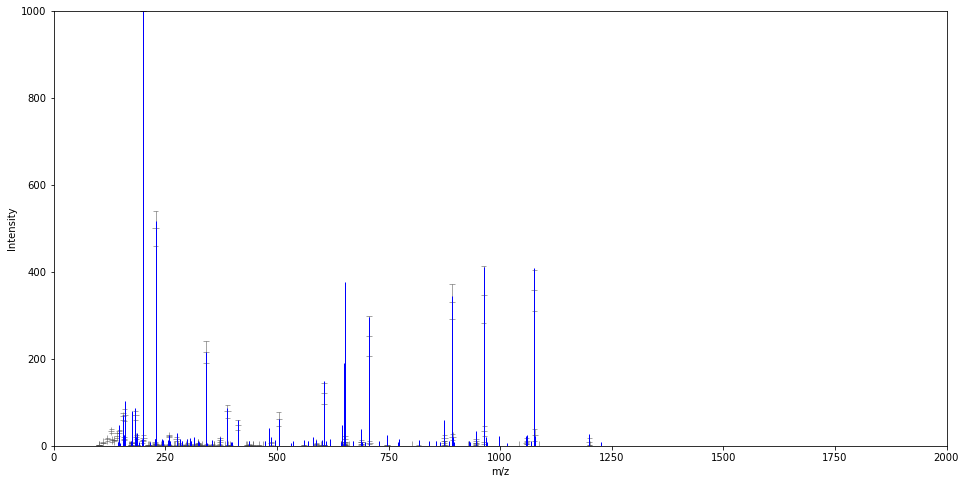

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
# select spectra from the 2nd row of the datafram
experimental_spectrum = df.iloc[1]['spectrum']
predicted_spectrum = df.iloc[1]['predicted_spectrum']
experimental_spectrum.plot(ax, predicted_spectrum, normalize=1000, mirror=False, plot_stddev=True)

## Plot two spectra with a mirror plot, no error bars

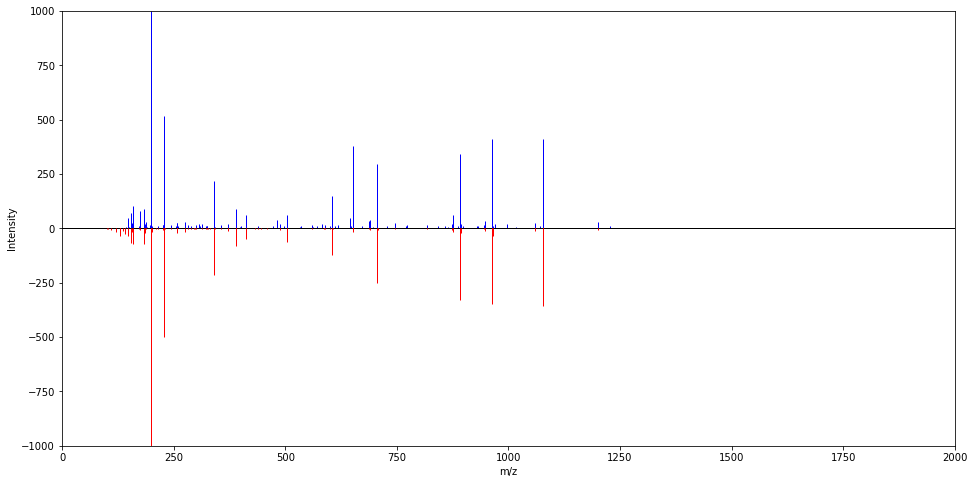

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
experimental_spectrum.plot(ax, predicted_spectrum, normalize=1000, mirror=True)

## Plot relationship between cosine score and various spectrum properties

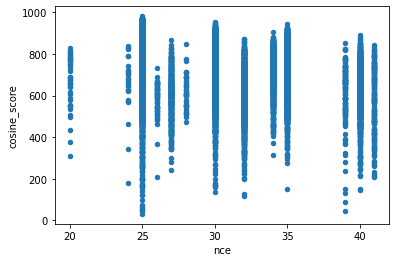

In [16]:
df.plot.scatter('nce', 'cosine_score')
plt.show()

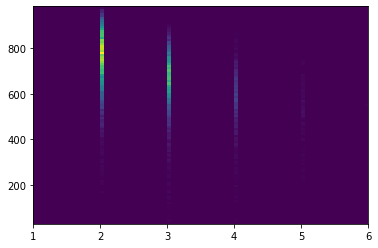

In [17]:
plt.hist2d(df['charge'], df['cosine_score'], bins = 100)
plt.show()

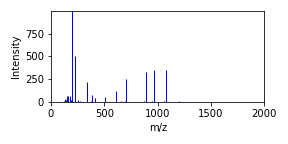

In [18]:
df['predicted_spectrum'].iloc[1]

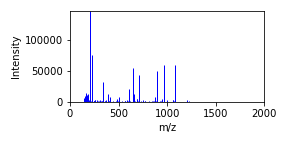

In [19]:
df['spectrum'].iloc[1]

## Compute the cosine score, which automatically changes the mass tolerance of the experimental spectra to evenly spaced bins instead of ppm

In [20]:
# get the experimental spectrum from the 5th row
experimental_spectrum = df['spectrum'].iloc[1]
# get the predicted spectrum from the 5th row
predicted_spectrum = df['predicted_spectrum'].iloc[1]

# convert the experimental spectra, which has ions in +/- 10ppm bins into a spectrum with evenly spaced bins
# that are the same size as the 

df['predicted_spectrum'].iloc[1].cosine_score(df['spectrum'].iloc[1])

682.8751554541735

## Access mz, intensity, and std deviation of the intensity for an example spectrum

In [21]:
print(df['predicted_spectrum'].iloc[1].products.mz)
print(df['predicted_spectrum'].iloc[1].products.intensity)
print(df['predicted_spectrum'].iloc[1].products.stddev)

[ 101.1  102.1  110.1  120.1  129.1  130.1  136.1  141.1  143.1  147.1
  155.1  157.1  159.1  169.1  171.1  173.1  175.1  183.1  185.1  185.2
  186.1  187.1  197.1  199.2  200.1  201.1  211.1  213.2  215.1  226.1
  227.2  228.1  229.1  230.1  240.1  243.1  244.1  244.2  257.2  258.1
  260.1  270.1  272.2  275.2  279.2  282.2  288.1  296.2  298.2  299.2
  308.2  313.2  323.2  324.2  326.2  331.1  341.2  342.2  354.2  355.2
  358.1  359.2  371.2  372.2  384.3  389.2  390.2  395.2  412.3  413.3
  431.2  432.2  437.7  438.2  446.7  447.2  459.2  469.2  472.3  486.2
  487.2  504.2  504.3  505.2  560.2  570.3  587.3  588.3  598.3  600.3
  605.3  606.3  643.3  643.4  644.3  651.3  651.4  651.8  652.3  652.4
  660.4  671.3  688.3  689.3  706.3  706.4  707.3  746.3  802.4  817.4
  857.4  874.4  875.4  876.4  892.4  893.4  928.4  930.4  945.4  945.5
  946.4  946.5  947.4  963.4  963.5  964.4  964.5 1041.5 1058.5 1059.5
 1060.5 1076.5 1076.6 1077.5 1086.5 1199.6 1200.6]
[1.80569640e+00 1.13138043

## Save predicted spectra as msp

### All predicted spectra

In [22]:
df['predicted_spectrum'].array.to_msp('all.msp')

### The predicted spectrum at row 0

In [23]:
df.iloc[[0]]['predicted_spectrum'].array.to_msp('single.msp')